In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
category_df = pd.read_csv('/content/category.csv')
customers_df = pd.read_csv('/content/customers.csv')
inventory_df = pd.read_csv('/content/inventory.csv')
order_items_df = pd.read_csv('/content/order_items.csv')
orders_df = pd.read_csv('/content/orders.csv')
payments_df = pd.read_csv('/content/payments.csv')
products_df = pd.read_csv('/content/products.csv')
sellers_df = pd.read_csv('/content/sellers.csv')
shipping_df = pd.read_csv('/content/shipping.csv')

In [9]:
datasets = {
    "Category": category_df,
    "Customers": customers_df,
    "Inventory": inventory_df,
    "Order Items": order_items_df,
    "Orders": orders_df,
    "Payments": payments_df,
    "Products": products_df,
    "Sellers": sellers_df,
    "Shipping": shipping_df
}

In [10]:
# Basic EDA function
def basic_eda(df, name):
    print(f"\n--- {name} Dataset ---")
    print("Shape:", df.shape)
    print("Columns:", df.columns)
    print("\nMissing values:\n", df.isnull().sum())
    print("\nData types:\n", df.dtypes)
    print("\nBasic statistics:\n", df.describe(include='all'))
    print("\nTop 5 rows:\n", df.head())

In [11]:
#Basic EDA for each dataset
for name, df in datasets.items():
    basic_eda(df, name)


--- Category Dataset ---
Shape: (6, 2)
Columns: Index(['Category_Id', 'Category_Name'], dtype='object')

Missing values:
 Category_Id      0
Category_Name    0
dtype: int64

Data types:
 Category_Id       int64
Category_Name    object
dtype: object

Basic statistics:
         Category_Id Category_Name
count      6.000000             6
unique          NaN             6
top             NaN   electronics
freq            NaN             1
mean       3.500000           NaN
std        1.870829           NaN
min        1.000000           NaN
25%        2.250000           NaN
50%        3.500000           NaN
75%        4.750000           NaN
max        6.000000           NaN

Top 5 rows:
    Category_Id   Category_Name
0            1     electronics
1            2        clothing
2            3  home & kitchen
3            4    Pet Supplies
4            5    Toys & Games

--- Customers Dataset ---
Shape: (898, 4)
Columns: Index(['Customer ID', 'first_name', 'last_name', 'state'], dtype='obje

### Visualizations

<ipython-input-18-91ac0d82a955>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


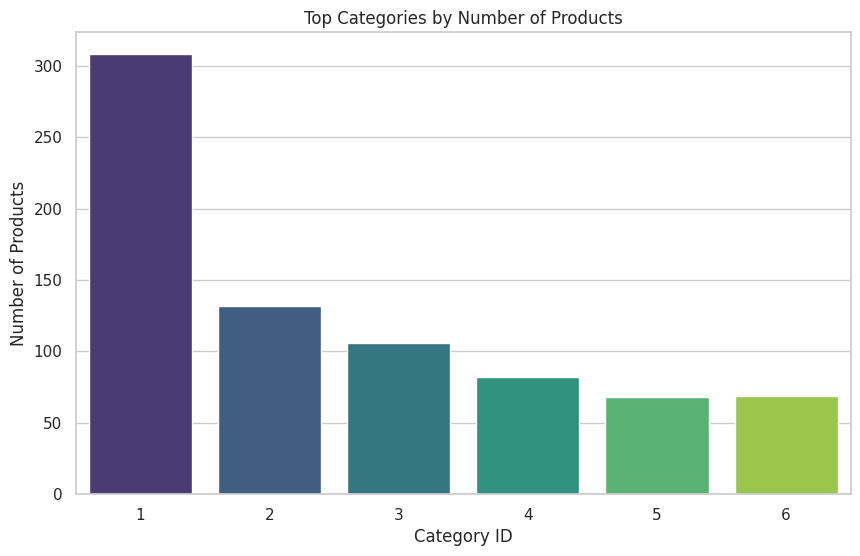

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a general plot style
sns.set(style="whitegrid")

# 1. Top Categories by Number of Products
plt.figure(figsize=(10, 6))
top_categories = products_df['category_id'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top Categories by Number of Products")
plt.xlabel("Category ID")
plt.ylabel("Number of Products")
plt.show()



<ipython-input-19-35681cf1134c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="magma")


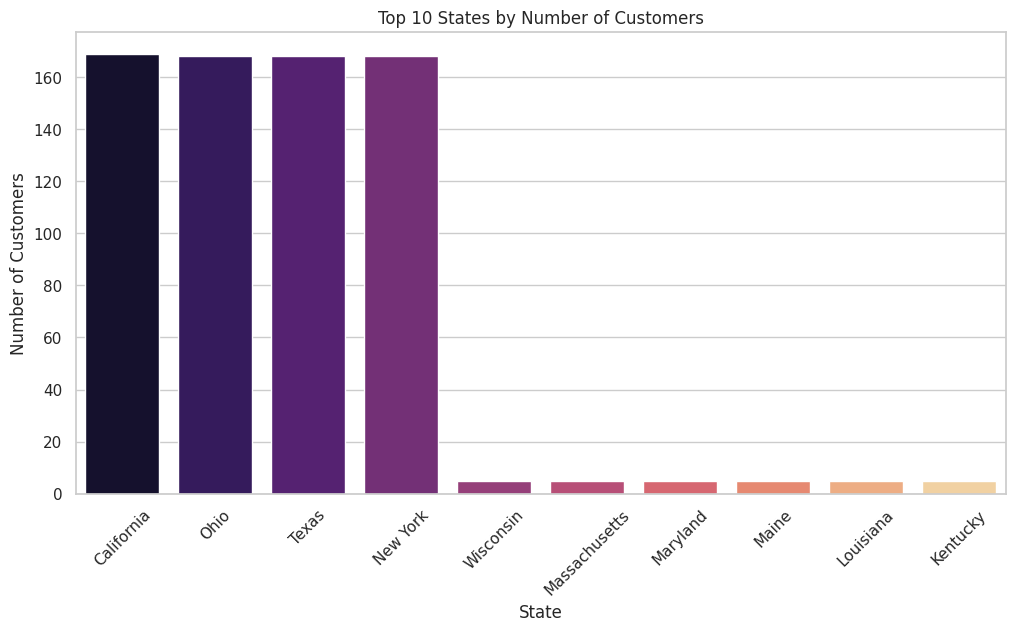

In [19]:
# 2. Distribution of Customer Locations (States)
plt.figure(figsize=(12, 6))
state_counts = customers_df['state'].value_counts().head(10)
sns.barplot(x=state_counts.index, y=state_counts.values, palette="magma")
plt.title("Top 10 States by Number of Customers")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()




<ipython-input-20-6acef8c4705d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stocked_products.index, y=top_stocked_products.values, palette="plasma")


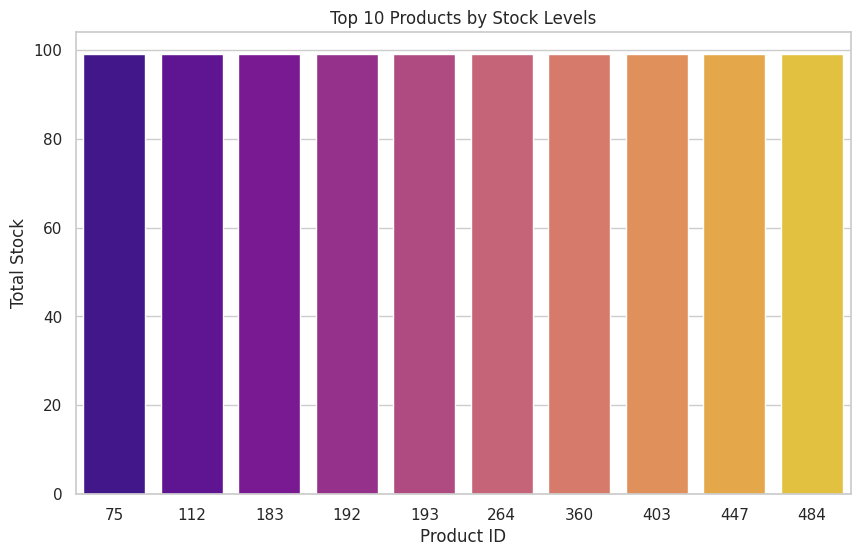

In [20]:
# 3. Stock Levels by Product
plt.figure(figsize=(10, 6))
top_stocked_products = inventory_df.groupby('product_id')['stock'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_stocked_products.index, y=top_stocked_products.values, palette="plasma")
plt.title("Top 10 Products by Stock Levels")
plt.xlabel("Product ID")
plt.ylabel("Total Stock")
plt.show()



<ipython-input-22-3972c52475ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_df, x='order_status', palette="coolwarm")


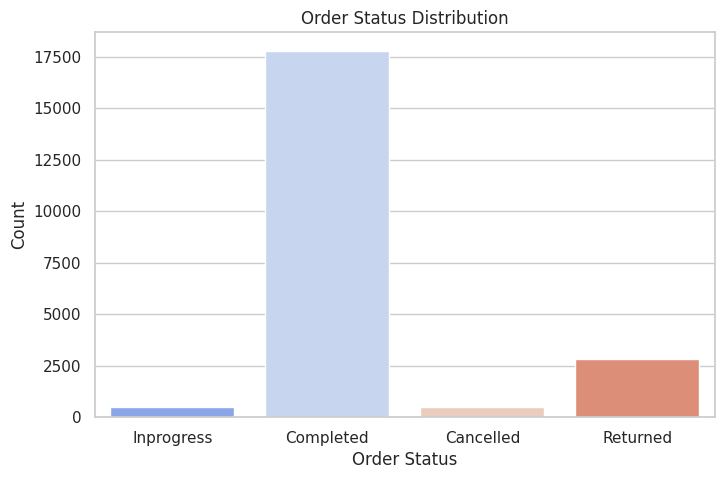

In [22]:
# 4. Order Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=orders_df, x='order_status', palette="coolwarm")
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.show()



<ipython-input-23-011e513480f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=payments_df, x='payment_status', palette="Blues")


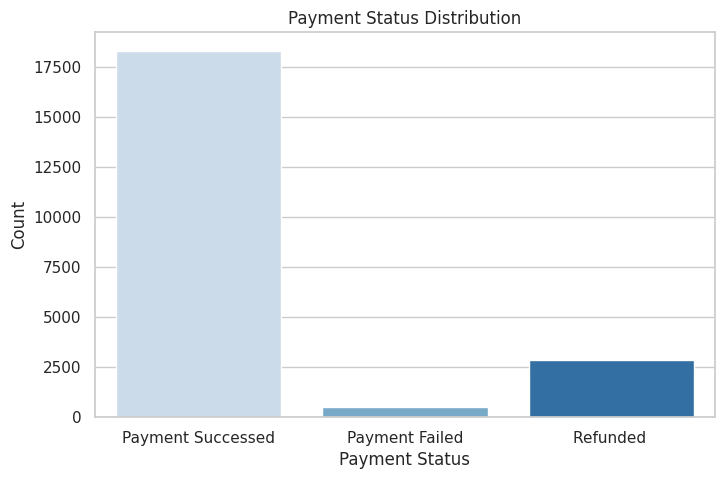

In [23]:
# 5. Payment Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=payments_df, x='payment_status', palette="Blues")
plt.title("Payment Status Distribution")
plt.xlabel("Payment Status")
plt.ylabel("Count")
plt.show()



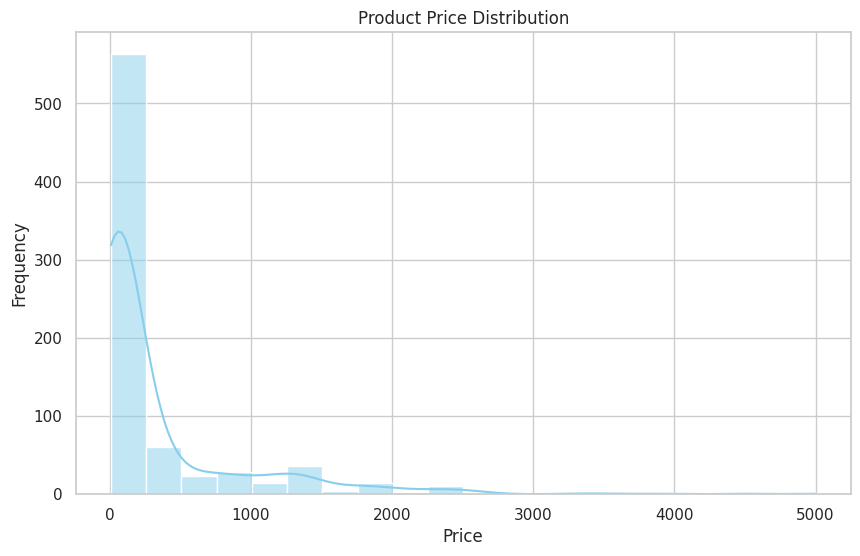

In [24]:
# 6. Product Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(products_df['price'], bins=20, kde=True, color="skyblue")
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()



<ipython-input-25-ffd4c15d3bcd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_sales.index, y=seller_sales.values, palette="viridis")


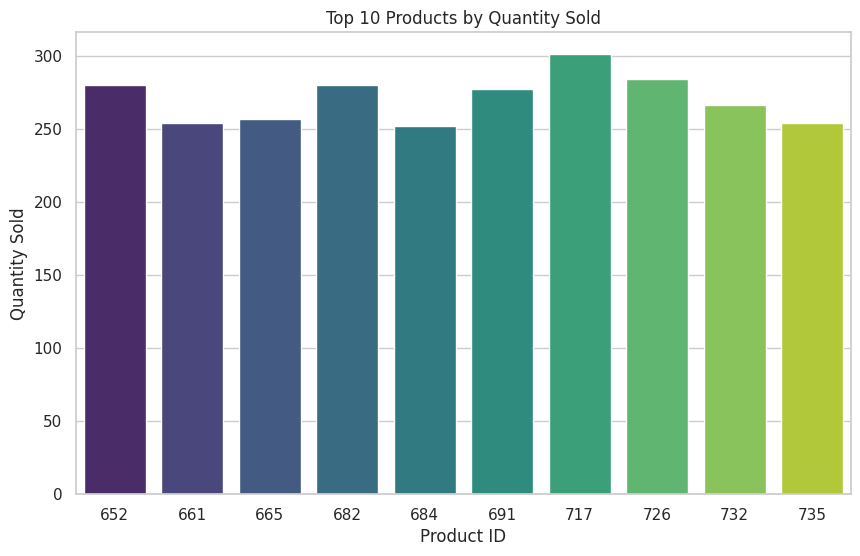

In [25]:
# 7. Top Sellers by Sales Quantity (corrected palette)
if 'quantity' in order_items_df.columns:
    seller_sales = order_items_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=seller_sales.index, y=seller_sales.values, palette="viridis")
    plt.title("Top 10 Products by Quantity Sold")
    plt.xlabel("Product ID")
    plt.ylabel("Quantity Sold")
    plt.show()



<ipython-input-26-5ffd47baa05b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_costs.index, y=shipping_costs.values, palette="Purples")


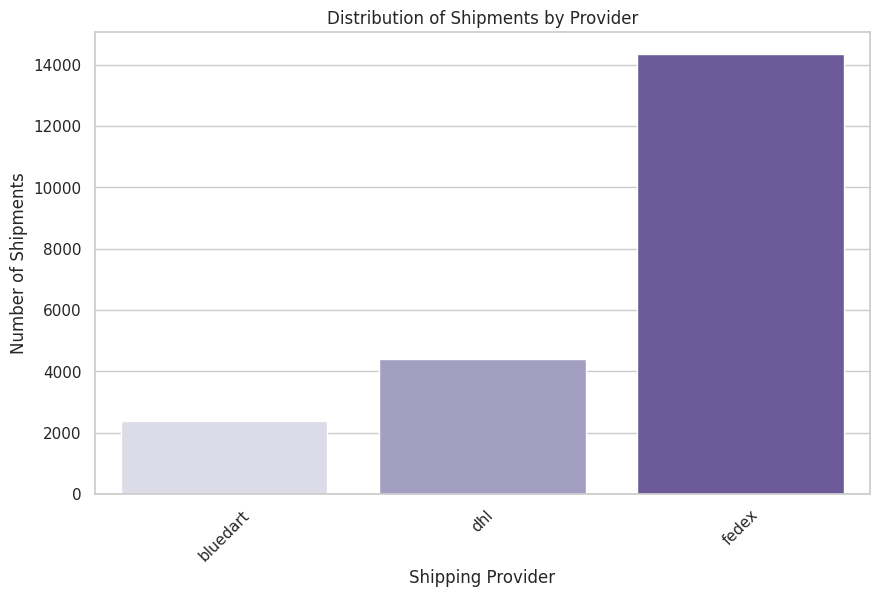

In [26]:
# 8. Average Shipping Cost by Provider (if available in the data)
if 'shipping providers' in shipping_df.columns and 'delivery_status' in shipping_df.columns:
    shipping_costs = shipping_df.groupby('shipping providers').size()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=shipping_costs.index, y=shipping_costs.values, palette="Purples")
    plt.title("Distribution of Shipments by Provider")
    plt.xlabel("Shipping Provider")
    plt.ylabel("Number of Shipments")
    plt.xticks(rotation=45)
    plt.show()


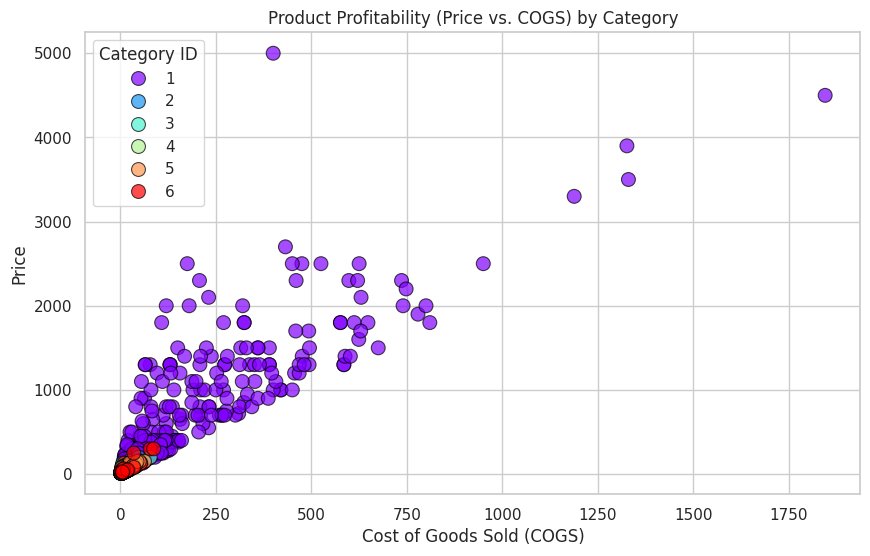

In [27]:

# 9. Product Profitability (Price vs. COGS)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=products_df, x='cogs', y='price', hue='category_id', palette="rainbow", s=100, edgecolor="black", alpha=0.7)
plt.title("Product Profitability (Price vs. COGS) by Category")
plt.xlabel("Cost of Goods Sold (COGS)")
plt.ylabel("Price")
plt.legend(title="Category ID")
plt.show()